# This Note is For After Class Review

## 2024/2/22

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pingouin as pg

### 1.在一个图上对比/观察不同自由度的卡方分布

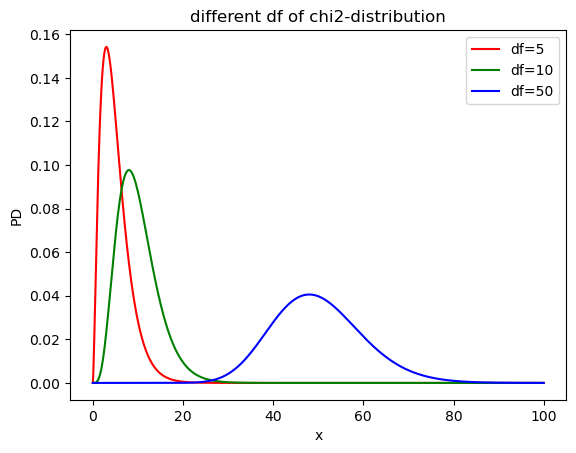

In [31]:
dfs = [5, 10, 50]
clrs = ["r", "g", "b"]
lbls = ["df=5", "df=10", "df=50"]
x = np.linspace(0,100,1000)
for df, clr, lbl in zip(dfs, clrs, lbls):
    y = stats.chi2.pdf(x,df)
    plt.plot(x, y, clr, label=lbl)
plt.title("different df of chi2-distribution")
plt.xlabel("x")
plt.ylabel("PD")
plt.legend()

### 2.计算$u_{0.025}$

In [32]:
p = 0.025
upper_quantile = stats.norm.ppf(1-p)   #计算累计概率，即下侧分位数
print("u_0.025 = ",upper_quantile)

u_0.025 =  1.959963984540054


## 2024/2/29

### 对比男生女生的身高和体重关系

<Axes: xlabel='Height', ylabel='Weight'>

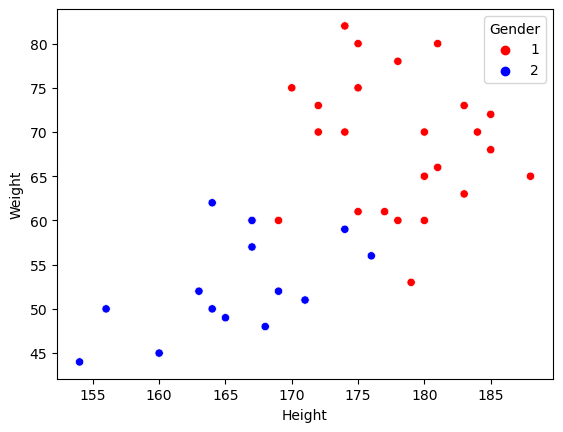

In [33]:
data = pd.read_csv("Datas\StudentData.csv")
sns.scatterplot(x="Height", y="Weight", hue="Gender", data=data, palette=["r", "b"])

## 2024/3/7

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics as sta

### 1.vs,am,gear, carb 的Mode

In [35]:
data = pd.read_csv("Datas/mtcars.csv")
df = pd.DataFrame(data)
vs_mode = sta.mode(data=df["vs"])
print(vs_mode)
#其他操作同理

0


### 2.cyl 的high, low median

In [36]:
cyl_median_upper = sta.median_high(data=df["cyl"])
print(cyl_median_upper)
cyl_median_lower = sta.median_low(data=df["cyl"])
print(cyl_median_lower)


6
6


### 3.mpg的range, lQR, mean, sample variance, sample standard deviation, population cv

参见homework3

## 2024/3/17

In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as sta
import statsmodels.api as sm

### 1.男生女生身高的分布密度图、箱体图和QQ图

In [38]:
data = pd.read_excel("Datas\Height.xlsx")

c:\Softwares\stem_softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

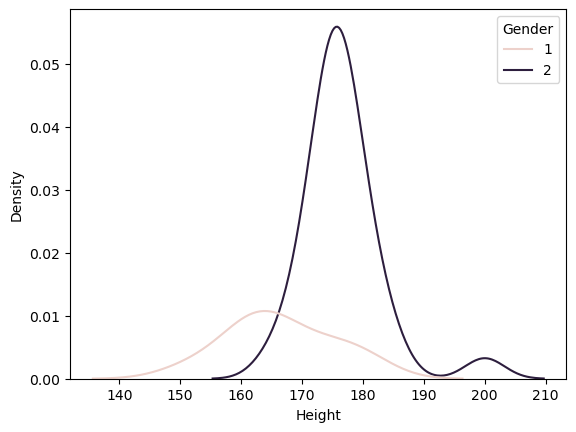

In [39]:
sns.kdeplot(x="Height", hue="Gender", data=data)

<Axes: xlabel='Gender', ylabel='Height'>

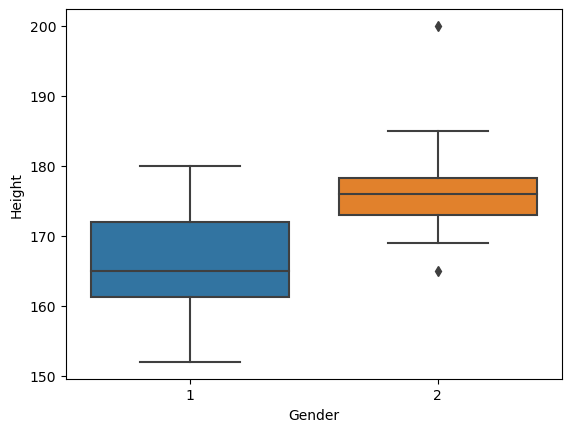

In [40]:
sns.boxplot(y="Height", x="Gender", data=data)

Text(0.5, 1.0, 'boys')

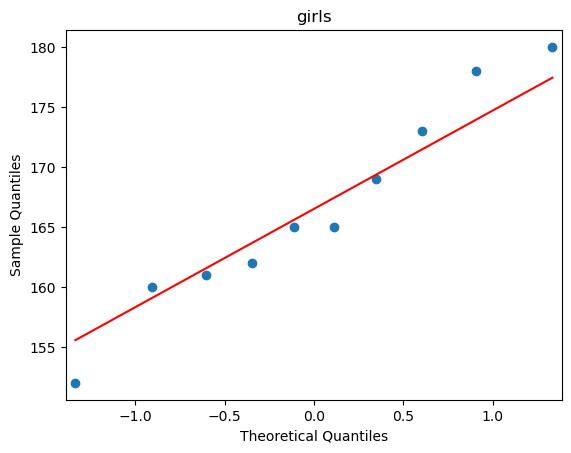

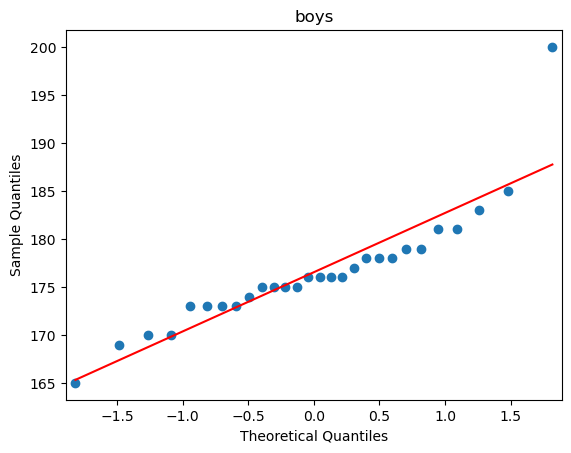

In [41]:
sm.qqplot(data[data["Gender"]==1]["Height"], stats.norm, line="s")
plt.title("girls")
sm.qqplot(data[data.Gender==2].Height, stats.norm, line="s")
plt.title("boys")

### 2.男生女生身高的mean，median，方差，标准差，kurtosis，skewness

In [42]:
data1 = data.drop("ID", axis=1)
df = data1.groupby("Gender")
mean = df.mean()
median = df.median()
varanince = df.var()
s = varanince**0.5
kurtosis = df.apply(lambda x:x.kurt())
skewness = df.skew()
print(stats.skew(data[data["Gender"]==2]["Height"]))
print(mean, median, varanince, s, kurtosis, skewness)

1.7179346337265768
            Height
Gender            
1       166.500000
2       176.535714         Height
Gender        
1        165.0
2        176.0            Height
Gender           
1       74.500000
2       39.443122           Height
Gender          
1       8.631338
2       6.280376         Gender    Height
Gender                  
1          0.0 -0.412676
2          0.0  6.632758           Height
Gender          
1       0.147737
2       1.816746


### 3.判断分布的正态性

男生正态性比女生好

### 4.身高均值的95%CI

In [43]:
def cacl_ci(data,alpha):
    n = len(data)
    s = data.var(ddof=1)**0.5
    m = data.mean()
    isf = stats.t.isf(alpha/2, n-1)
    moe = isf*s/(np.sqrt(n))
    return m-moe, m+moe
alpha = 0.05
print("girls:",cacl_ci(data[data.Gender==1].Height,alpha))
print("boys:",cacl_ci(data[data["Gender"]==2]["Height"],alpha))

girls: (160.32551257466616, 172.67448742533384)
boys: (174.10043873408196, 178.9709898373466)


### 5.身高差的95%CI

In [44]:
#计算两个独立正态总体的均值差的CI，方差未知且不相等,直接调用demo里的Welch's t-检验（概统里是用近似于Z分布来做）
def dmean_ci_ind_welch_t(data1,data2,alpha=0.05):
    n1,n2,var1,var2=len(data1),len(data2),np.var(data1,ddof=1),np.var(data2,ddof=1)
    M=data1.mean()-data2.mean()   
    v=(var1/n1+var2/n2)**2/((1/(n1-1)*(var1/n1)**2)+(1/(n2-1)*(var2/n2)**2))
    Ta=stats.t.isf(alpha/2,v,0,1)
    moe=Ta*np.sqrt(var1/n1+var2/n2)
    return M-moe,M+moe
print(dmean_ci_ind_welch_t(data[data["Gender"]==1]["Height"], data[data["Gender"]==2]["Height"], 0.05))

(-16.487873405921476, -3.583555165507078)


### 6.男生女生身高的errorbar图

<Axes: xlabel='Gender', ylabel='Height'>

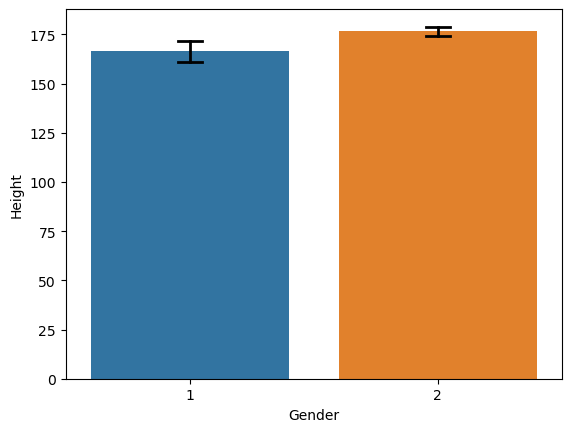

In [45]:
alpha2 = 0.05
sns.barplot(data=data, x="Gender", y="Height",
            errorbar=("ci", (1-alpha2)*100), errcolor="black",
            capsize=0.1, errwidth=2)

## 2024/3/21

### 研究高原集训是否能够增加肺活量，假定正常人在训练前后肺活量均值增加了200 ml，肺活量增量的标准差为800 ml。 请用Python模拟n=20个人在训练后肺活量的增加值，用零假设显著性检验，判断在p=0.05显著性水平上，该训练是否有效提高肺活量？ （注：采用单边检验）  

假设:$H_0:\mu<0;H_1:\mu\geq0$

In [46]:
ms = 200
s = 800
n = 20
mu = 0
sem = s / np.sqrt(n)
stdX = ( ms - mu ) / sem
p = stats.t.sf(stdX, n-1)
print("p=", p)
# print(stdX)
# print(stats.t.isf(0.05,19))

p= 0.1387450697878803


p>>0.05，我不能拒绝$H_0$

### 为期50天的认知训练实验，招募了16名被试，实验前后分别测量16人认知分数值的平均认知分数提高了8.5，样本方差为5.5。实际中，如果认知分数增加值超过了7.5，才认为对认知功能有实质的提高，请分别用置信区间和零假设显著性检验来回答这个问题

假设:$H_0:\mu\geq7.5;H_1:\mu<7.5$

In [47]:
ms = 8.5
s = 5.5
n = 16
mu = 7.5
sem = s / np.sqrt(n)
stdX = ( ms - mu ) / sem
p = stats.t.sf(stdX, n-1)
print("p=", p)
moe = stats.t.isf(0.05, 15)
print("95%CI=", ms-moe*sem)

p= 0.23912864436911258
95%CI= 6.089555760922737


我无法拒绝$H_0$，但也不能接受

## 2024/3/28

### DrugDose-new的ANOVA分析

In [48]:
DrugDose = pd.read_csv("Datas\DrugDose-New.csv")

pg.anova(data=DrugDose, detailed=True, between="Group", dv="Scores")

,Source,SS,DF,MS,F,p-unc,np2
0,Group,187.944930,3,62.648310,8.857294,0.000067,0.321803
1,Within,396.092216,56,7.073075,NaN,NaN,NaN


one-way ANOVA shows that there exsists big diference between the mean of different group(F(3,56)=8.86, p=0.000067, eta2=0.321803)

## 2024/4/11

### aphasia的1-way RM ANOVA分析

One-way repeated measure ANOVA 6个中风后语言障碍的病人，分别进行了三种语言测试任务： Speak(说), Conceptual（概念）, Syntax（句法规则）， 每个人测试十次，下面的表格是每个病人，每种测试任务下成功的次数，请检验三种任务完成是否具有显著差异。

In [49]:
aphasia = pd.read_csv("Datas/aphasia.csv")

In [50]:
aphasia.head()

,Subject,Test,Score,Unnamed: 3
0,1,Speech,8,NaN
1,2,Speech,7,NaN
2,3,Speech,9,NaN
3,4,Speech,5,NaN
4,5,Speech,6,NaN


1. 正态性检验

In [51]:
speech = aphasia[aphasia.Test=="Speech"].Score
conceptual = aphasia[aphasia.Test=="Conceptual"].Score
syntax = aphasia[aphasia.Test=="Syntax"].Score

print(stats.shapiro(x=speech))     #shapiro将数据与正态分布做检验
print(stats.shapiro(x=conceptual)) #0假设是数据服从正态分布
print(stats.shapiro(x=syntax))     #当p<.05时，认为不是正态分布

ShapiroResult(statistic=0.958012044429779, pvalue=0.8042958378791809)
ShapiroResult(statistic=0.958012044429779, pvalue=0.8042958378791809)
ShapiroResult(statistic=0.919944703578949, pvalue=0.5049630999565125)


2. 做1-way RM ANOVA，看看均值是否相等

In [52]:
aov = pg.rm_anova(data=aphasia, dv="Score", within="Test", subject="Subject", detailed=True)
print(aov)

  Source         SS  DF         MS         F     p-unc       ng2       eps
0   Test  24.777778   2  12.388889  6.925466  0.012956  0.414498  0.868492
1  Error  17.888889  10   1.788889       NaN       NaN       NaN       NaN


3. anova显示了很强的显著性（p=，01），需要进一步检验各组之间的差异

In [53]:
mc = pg.pairwise_ttests(data=aphasia, dv="Score", within="Test", subject="Subject", padjust="bonf")
print(mc)

  Contrast           A       B  Paired  Parametric         T  dof alternative  \
0     Test  Conceptual  Speech    True        True -1.463850  5.0   two-sided   
1     Test  Conceptual  Syntax    True        True  2.607250  5.0   two-sided   
2     Test      Speech  Syntax    True        True  3.114159  5.0   two-sided   

      p-unc    p-corr p-adjust   BF10    hedges  
0  0.203111  0.609332     bonf  0.783 -0.627107  
1  0.047828  0.143485     bonf  2.157  1.088607  
2  0.026426  0.079278     bonf  3.337  1.682392  


c:\Softwares\stem_softwares\Anaconda\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [54]:
mc = pg.pairwise_tests(data=aphasia, dv="Score", within="Test", subject="Subject", padjust="bonf")  #两个函数是一样的
print(mc)

  Contrast           A       B  Paired  Parametric         T  dof alternative  \
0     Test  Conceptual  Speech    True        True -1.463850  5.0   two-sided   
1     Test  Conceptual  Syntax    True        True  2.607250  5.0   two-sided   
2     Test      Speech  Syntax    True        True  3.114159  5.0   two-sided   

      p-unc    p-corr p-adjust   BF10    hedges  
0  0.203111  0.609332     bonf  0.783 -0.627107  
1  0.047828  0.143485     bonf  2.157  1.088607  
2  0.026426  0.079278     bonf  3.337  1.682392  


### 研究BMI是否与性别，运动习惯有关

In [55]:
bmi = pd.read_csv("Datas/bmiStudy.csv")

In [56]:
bmi.head()

,Gender,Sports,Height,Weight
0,Male,NoGym,173,73.5
1,Male,NoGym,176,78.9
2,Male,NoGym,174,60.0
3,Male,NoGym,173,75.4
4,Male,NoGym,174,63.5


In [57]:
bmis = bmi.Weight / bmi.Height ** 2 *10000
bmi["bmi"] = bmis                              #加了一列bmi
bmi.head()

,Gender,Sports,Height,Weight,bmi
0,Male,NoGym,173,73.5,24.558121
1,Male,NoGym,176,78.9,25.471333
2,Male,NoGym,174,60.0,19.817677
3,Male,NoGym,173,75.4,25.192957
4,Male,NoGym,174,63.5,20.973709


In [58]:
aov = pg.anova(dv="bmi", between=["Gender","Sports"], detailed=True, data=bmi)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Gender,7.352734,1.0,7.352734,1.140014,0.291748,0.026426
1,Sports,5.994051,1.0,5.994051,0.929355,0.340549,0.021648
2,Gender * Sports,2.800880,1.0,2.800880,0.434266,0.513500,0.010234
3,Residual,270.886815,42.0,6.449686,NaN,NaN,NaN


2-way anova显示，性别(F(1,42)=1.14,p=.29,eta2=0.026)和运动习惯(F(1,42)=0.93,p=.34,eta2=0.021)对BMI的效应不显著，且性别和运动习惯的相互作用(F(1,42)=0.43,p=.51,eta2=0.01)不显著